# IMPORTING LIBRARIES

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## DATA PREPROCESSING

### TRAINING IMAGE PREPROCESSING

In [41]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### VALIDATION IMAGE PREPROCESSING

In [42]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [43]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [46]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[147.   141.   145.  ]
   [144.75 138.75 142.75]
   [149.75 143.75 147.75]
   ...
   [144.25 138.25 148.25]
   [145.   139.   149.  ]
   [145.5  139.5  149.5 ]]

  [[153.5  147.5  151.5 ]
   [148.   142.   146.  ]
   [146.5  140.5  144.5 ]
   ...
   [142.5  136.5  146.5 ]
   [141.5  135.5  145.5 ]
   [140.5  134.5  144.5 ]]

  [[146.   140.   144.  ]
   [148.   142.   146.  ]
   [149.5  143.5  147.5 ]
   ...
   [135.5  129.5  139.5 ]
   [145.75 139.75 149.75]
   [140.25 134.25 144.25]]

  ...

  [[100.25  91.25  96.25]
   [115.   106.   111.  ]
   [111.   102.   107.  ]
   ...
   [112.5  103.5  108.5 ]
   [103.    94.    99.  ]
   [ 89.    80.    85.  ]]

  [[110.25 101.25 106.25]
   [112.5  103.5  108.5 ]
   [103.5   94.5   99.5 ]
   ...
   [107.25  98.25 103.25]
   [108.    99.   104.  ]
   [102.    93.    98.  ]]

  [[120.75 111.75 116.75]
   [114.   105.   110.  ]
   [120.   111.   116.  ]
   ...
   [113.5  104.5  109.5 ]
   [105.25  96.25 101.25]
   [ 95.5   86.5   9

### To Avoid Overshooting
1. Choose small learning rate default 0.001, we are taking 0.0001
2. There may be chance of Underfitting, so increase the number of neuron
3. To avoid Underfitting, add more conv. layer to extract more feature from images there may be possibility that model unable to capture relevant feature
or model is confusing due to lack of feature so feed with more feature

## BUILDING MODEL

In [49]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [51]:
model = Sequential()

## BUILDING CONVOLUTIONAL LAYER

In [53]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [57]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [59]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

### After Model Training we add more conv. layer and increasing the neurons from 1270 to 1500. Adding Dropout

In [61]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [63]:
model.add(Dropout(0.25)) # To avoid overfitting

In [65]:
model.add(Flatten())

In [67]:
model.add(Dense(units=1500,activation='relu'))

In [69]:
model.add(Dropout(0.4))

In [71]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### COMPILING MODEL

In [73]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [91]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3395s 2s/step - accuracy: 0.4014 - loss: 2.1258 - val_accuracy: 0.8404 - val_loss: 0.5069
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3034s 1s/step - accuracy: 0.8431 - loss: 0.4952 - val_accuracy: 0.8799 - val_loss: 0.3757
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3090s 1s/step - accuracy: 0.9107 - loss: 0.2736 - val_accuracy: 0.9278 - val_loss: 0.2270
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3607s 2s/step - accuracy: 0.9363 - loss: 0.1931 - val_accuracy: 0.9153 - val_loss: 0.2614
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3524s 2s/step - accuracy: 0.9529 - loss: 0.1405 - val_accuracy: 0.9526 - val_loss: 0.1442
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4116s 2s/step - accuracy: 0.9660 - loss: 0.1019 - val_accuracy: 0.9568 - val_loss: 0.1412
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3920s 2s/step - accuracy: 0.9726 - loss: 0.0853 - val_accuracy: 0.9635 - val_loss: 0.1150
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4202s 2s/step - accuracy: 0.9768 -

In [95]:
model.save("trained_model.keras")

### Model Evaluation

In [98]:
#Model Evaluation on Training Set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 916s 417ms/step - accuracy: 0.9911 - loss: 0.0263


In [102]:
print(train_loss,train_acc)

0.022999508306384087 0.9923750162124634


In [104]:
#Model Evaluation on Validation Set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 227s 412ms/step - accuracy: 0.9691 - loss: 0.1118


In [105]:
print(val_loss,val_acc)

0.10745134204626083 0.9689278602600098


In [108]:
model.save("trained_model.keras")

In [110]:
training_history.history

{'accuracy': [0.6066718697547913,
  0.8643004298210144,
  0.9187139868736267,
  0.9420442581176758,
  0.9554591178894043,
  0.9665694832801819,
  0.9732840061187744,
  0.9766839742660522,
  0.9794864654541016,
  0.982616126537323],
 'loss': [1.3379170894622803,
  0.427254855632782,
  0.25073644518852234,
  0.17686618864536285,
  0.13410060107707977,
  0.10154750198125839,
  0.08400103449821472,
  0.07133184373378754,
  0.06192299351096153,
  0.0547826886177063],
 'val_accuracy': [0.8403710722923279,
  0.8798657059669495,
  0.9277828335762024,
  0.9153198003768921,
  0.952595055103302,
  0.9568063020706177,
  0.9635215401649475,
  0.9611882567405701,
  0.9669929146766663,
  0.9689278602600098],
 'val_loss': [0.5068924427032471,
  0.375666081905365,
  0.22700278460979462,
  0.26143839955329895,
  0.14415952563285828,
  0.14116229116916656,
  0.11503048986196518,
  0.12222914397716522,
  0.10727234184741974,
  0.10745132714509964]}

In [112]:
#Recording History in Json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

### ACCURACY VISUALIZATION

In [121]:
training_history.history['accuracy']

[0.6066718697547913,
 0.8643004298210144,
 0.9187139868736267,
 0.9420442581176758,
 0.9554591178894043,
 0.9665694832801819,
 0.9732840061187744,
 0.9766839742660522,
 0.9794864654541016,
 0.982616126537323]

In [123]:
training_history.history['val_accuracy']

[0.8403710722923279,
 0.8798657059669495,
 0.9277828335762024,
 0.9153198003768921,
 0.952595055103302,
 0.9568063020706177,
 0.9635215401649475,
 0.9611882567405701,
 0.9669929146766663,
 0.9689278602600098]

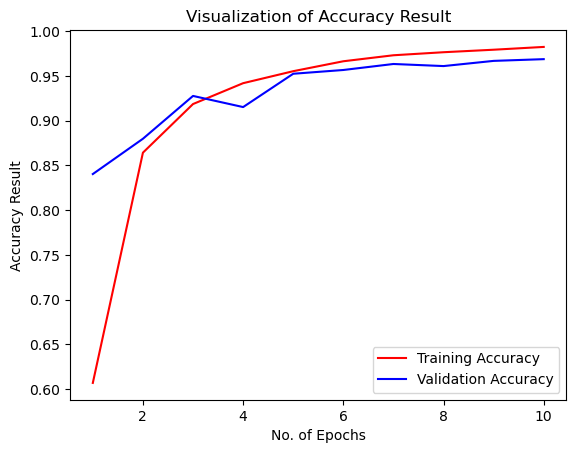

In [131]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## SOME OTHER METRICS for MODEL EVALUATION

In [139]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [141]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [143]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 212s 384ms/step


(array([[1.0000000e+00, 3.3550799e-12, 4.9399910e-13, ..., 3.2796960e-17,
         9.3279969e-16, 3.6235979e-16],
        [9.9999976e-01, 3.7578204e-11, 3.0652220e-13, ..., 3.1960540e-18,
         1.6688042e-16, 1.0713867e-16],
        [1.0000000e+00, 1.6790494e-13, 2.3601076e-12, ..., 1.4183971e-19,
         1.1400680e-16, 3.3606740e-14],
        ...,
        [5.5490912e-10, 4.8910342e-14, 1.1853149e-08, ..., 2.3839444e-11,
         2.2251287e-12, 9.9997997e-01],
        [1.4190580e-07, 1.4069335e-12, 1.9610278e-08, ..., 2.4510147e-09,
         1.9950668e-10, 9.9999166e-01],
        [1.4322883e-20, 5.3582169e-22, 6.6293336e-19, ..., 8.7188027e-22,
         2.9058051e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [145]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [147]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [151]:
true_categories = tf.concat([y for x, y in test_set], axis=0)

In [153]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [155]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

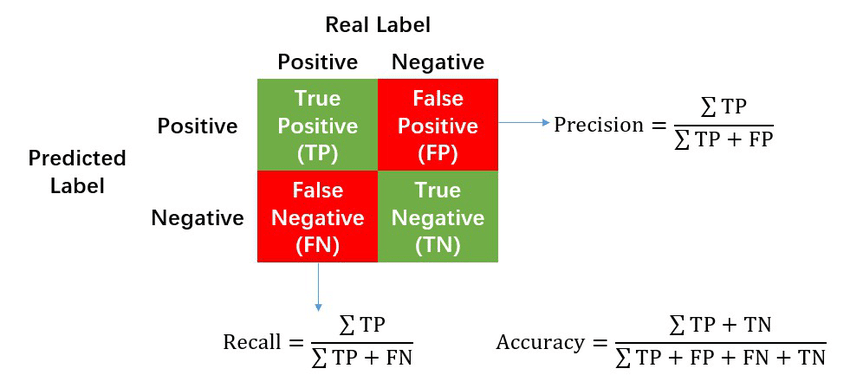

In [167]:
from sklearn.metrics import classification_report,confusion_matrix

In [169]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.96      0.96       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.97      0.95      0.96       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.92      0.92       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.95      0.

In [173]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[483,   1,   0, ...,   0,   0,   0],
       [  2, 486,   0, ...,   0,   0,   0],
       [  0,   0, 429, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 484,   0,   0],
       [  0,   0,   0, ...,   0, 443,   0],
       [  0,   0,   1, ...,   0,   0, 479]], dtype=int64)

## CONFUSION MATRIX VISUALIZATION

<function matplotlib.pyplot.show(close=None, block=None)>

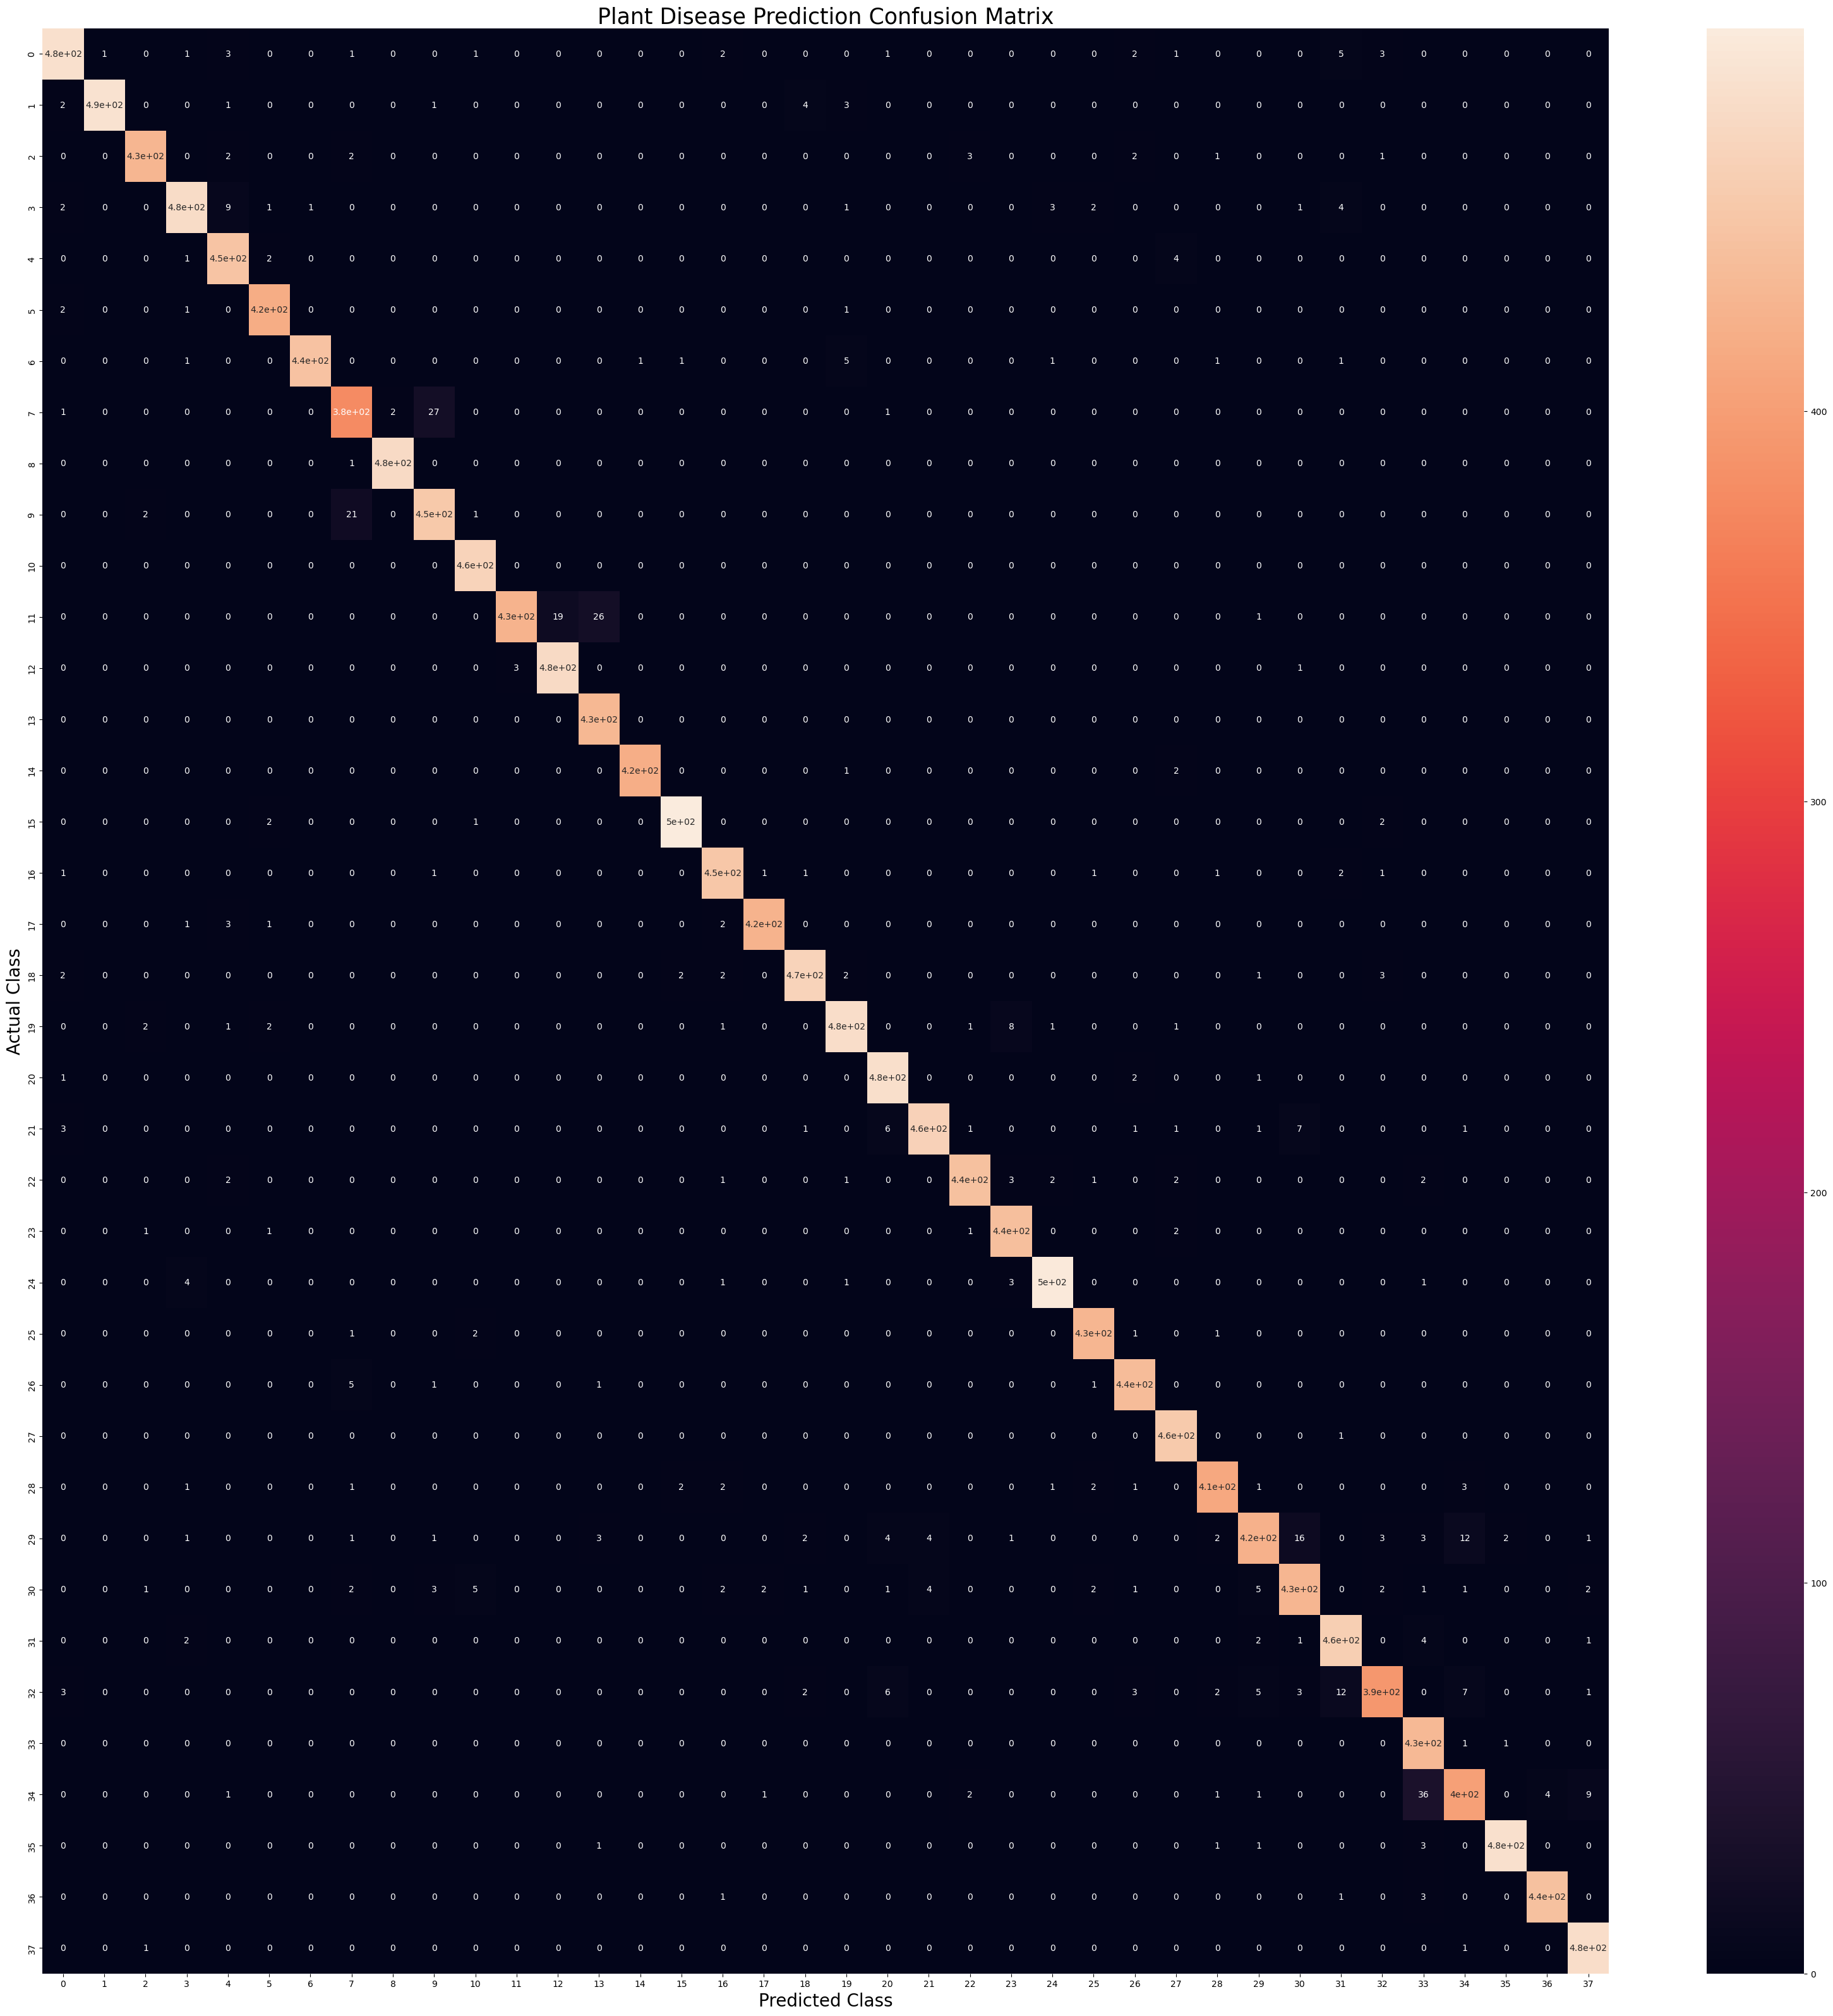

In [186]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show